# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function

"""This function allows the user to use their own api stored on their machine"""

load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC

"""Here we are importing the data via api from the following website for Bitcoin"""

btc_response = requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD").json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18905537,
            "id": 1,
            "last_updated": 1639971773,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 880338548505,
                    "percent_change_1h": -0.544507221342797,
                    "percent_change_24h": -3.1601624688906,
                    "percent_change_7d": -6.94405942885177,
                    "percentage_change_1h": -0.544507221342797,
                    "percentage_change_24h": -3.1601624688906,
                    "percentage_change_7d": -6.94405942885177,
                    "price": 46576.0,
                    "volume_24h": 23741686375
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18905537,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [7]:
# Using the Python requests library, make an API call to access the current price ETH

"""Here we are importing the data via api from the following website for Ethereum"""

eth_response = requests.get("https://api.alternative.me/v2/ticker/Ethereum/?convert=USD").json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 118811620,
            "id": 1027,
            "last_updated": 1639971776,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 463143412148,
                    "percent_change_1h": -1.00595166887542,
                    "percent_change_24h": -3.0762320577882,
                    "percent_change_7d": -5.71286479138551,
                    "percentage_change_1h": -1.00595166887542,
                    "percentage_change_24h": -3.0762320577882,
                    "percentage_change_7d": -5.71286479138551,
                    "price": 3899.57,
                    "volume_24h": 16254659510
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 118811620,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

In [8]:
# Navigate the BTC response object to access the current price of BTC

"""Here we are pulling just the closing price intergers for BTC for calculations"""

btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]
btc_price

# Print the current price of BTC
print(f"The price for Bitcoin is ${btc_price}")


The price for Bitcoin is $46576.0


In [9]:
# Navigate the BTC response object to access the current price of ETH

"""Here we are pulling just the closing price intergers for ETH for calculations"""

eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]
eth_price

# Print the current price of ETH
print(f"The price for Ethereum is ${eth_price}")


The price for Ethereum is $3899.57


In [10]:
# Compute the current value of the BTC holding 

"""In this function we are calculating the client's current holding value in USD of BTC"""

btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"The current value of your Bitcoin is ${btc_value}")


The current value of your Bitcoin is $55891.2


In [11]:
# Compute the current value of the ETH holding 

"""In this function we are calculating the client's current holding value in USD of ETH"""

eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f"The current value of your Ethereum is ${eth_value}")


The current value of your Ethereum is $20667.721


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding

"""This function prints a total value of crypto value statement"""

total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"Your cryptocurrency wallet balance is ${total_crypto_wallet}")


Your cryptocurrency wallet balance is $76558.921


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.

"""Defined variables to represent the client's shared of certain stocks."""

spy_shares = 110
agg_shares = 200


In [14]:
# Set the variables for the Alpaca API and secret keys

"""This function uses the users api keys to request data from the server"""

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

display(type(alpaca_api_key))

str

In [15]:
"""This function defines the start and end date in isoformat date time format 
of the data you wish to import from the server using an api
"""
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()





In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame

"""This function allows the user to create a dataframe to use for calculations of the portfolio"""

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

df_portfolio
#print(type(df_portfolio))

AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2020-08-07 00:00:00-04:00  119.66  119.73  119.395  119.445  8830420  333.28   

                                                            
                             high    low   close    volume  
time                                                        
2020-08-07 00:00:00-04:00  334.88  332.3  334.55  98710236

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
#df_portfolio["close"].apply(lambda x: float(x))
#agg_close_price = (df_portfolio["AGG"]["close"]).apply(lambda x: float(x))
#agg_close_price["A"].apply(lambda x: float(x))

"""Here we are separating just the close prices of each stock and turning them into an interger"""

agg_close_price = float(df_portfolio["AGG"]["close"][0])
# Print the AGG closing price
agg_close_price



119.445

In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number

"""Here we are separating just the close prices of each stock and turning them into an interger"""

spy_close_price = float(df_portfolio["SPY"]["close"][0])

# Print the SPY closing price
spy_close_price



334.55

In [19]:

"""This function calculates the value of the client's current holdings"""

# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f"The total value of AGG is ${agg_value}")


The total value of AGG is $23889.0


In [20]:
"""This function calculates the value of the client's current holdings"""

# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * agg_shares

# Print the current value of the stock portfolio
print(f"The total value of SPY is ${spy_value}")


The total value of SPY is $66910.0


In [21]:
"""Here we have defined a function to calulate the total value of the client's stock and bond holdings"""

# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The total balance of your stock and bond portfolio is ${total_stocks_bonds}")


The total balance of your stock and bond portfolio is $90799.0


In [22]:
"""Writing a print statement for the clients to view their total crypto, stocks, and bond values"""

# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
print(f"Your cryptocurrency wallet balance is ${total_crypto_wallet}")
print(f"The total balance of your stocks, bonds, and cryptocurrency is ${total_portfolio}")


Your cryptocurrency wallet balance is $76558.921
The total balance of your stocks, bonds, and cryptocurrency is $167357.921


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


In [23]:
"""Using a list to calculate the current savings data for later calculations"""

# Consolidate financial assets data into a Python list
savings_data = ["Crypto Currency Wallet", total_crypto_wallet], ["Stocks Bonds Portfolio", total_portfolio]

# Review the Python list savings_data
savings_data
    

(['Crypto Currency Wallet', 76558.921], ['Stocks Bonds Portfolio', 167357.921])

In [24]:
"""Here we have created a dataframe to use to plot the client's financial holdings, risk/return analysis"""

# Create a Pandas DataFrame called savings_df 
#savings_df = pd.DataFrame(data=[total_crypto_wallet, total_portfolio])
savings_df = pd.DataFrame(savings_data)
#savings_df = pd.DataFrame(savings_data, data=[total_crypto_wallet, total_portfolio])
columns = ["Type", "Value"]
savings_df.columns = columns
#index="Type"
# Display the savings_df DataFrame
savings_df


,Type,Value
0,Crypto Currency Wallet,76558.921
1,Stocks Bonds Portfolio,167357.921


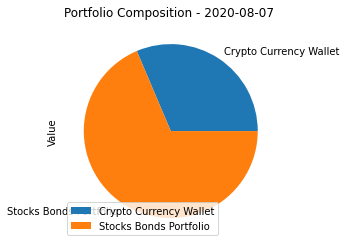

In [25]:
"""We have created a pie chart function to be able to visualize the client's holdings"""

# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_pie_df = pd.DataFrame(
    {"Value":[total_crypto_wallet, total_portfolio]},
    index=["Crypto Currency Wallet", "Stocks Bonds Portfolio"]
)
savings_pie_df.plot.pie(y='Value', title='Portfolio Composition - 2020-08-07 ')
legend="Crypto Currency Wallet", "Stocks Bonds Portfolio"


In [26]:
"""Created a variable called Emergency Fund Value for use in later calculations"""

# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income


In [27]:
"""This function defines an if else function to determine if the client has enough funds in their emergency fund"""

# Evaluate the possibility of creating an emergency fund with 3 conditions:
total_portfolio_value = total_portfolio + total_crypto_wallet
if (total_portfolio_value > emergency_fund_value):
    print(f"Congratulations. You have enough money in this fund")

elif (total_portfolio_value == emergency_fund_value):
    print(f"Congratulations on meeting your important financial goal")

else:
    print(f"You are {emergency_fund_value - total_portfolio_value} from reaching this goal")




Congratulations. You have enough money in this fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data

"""Here we have set new time parameters in order to caluclate the risk/returns percentages using the Monte Carlo simulation"""

start_date_threeyrs = pd.Timestamp("2017-08-07", tz="America/New_York").isoformat()
end_date_threeyrs = pd.Timestamp("2020-08-08", tz="America/New_York").isoformat()


In [29]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 

"""We have created a dataframe in order to calulate risk/return using plots and visualizations"""

df_portfolio_three_yrs = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date_threeyrs,
    end = end_date_threeyrs,
    limit=1000
).df


display(df_portfolio_three_yrs.head())
display(df_portfolio_three_yrs.tail())



AGG                                         \
                             open    high       low     close     volume   
time                                                                       
2017-08-07 00:00:00-04:00  109.69  109.72  109.6066  109.6850  1425317.0   
2017-08-08 00:00:00-04:00  109.67  109.69  109.5000  109.5810  1998999.0   
2017-08-09 00:00:00-04:00  109.87  109.87  109.6600  109.6700  2069028.0   
2017-08-10 00:00:00-04:00  109.70  109.85  109.6700  109.8053  1691677.0   
2017-08-11 00:00:00-04:00  109.75  109.94  109.6800  109.8850  1613467.0   

                              SPY                                     
                             open    high     low    close    volume  
time                                                                  
2017-08-07 00:00:00-04:00  247.49  247.87  247.37  247.850  20901988  
2017-08-08 00:00:00-04:00  247.51  248.91  246.83  247.291  44619069  
2017-08-09 00:00:00-04:00  246.47  247.31  246.06  247.230  48543032  
2017-08-10 00:00:00-04:00  246.28  246.44  243.70  243.790  87857827  
2017-08-11 00:00:00-04:00  244.02  244.80  243.75  244.110  56404847

AGG                                         \
                             open    high       low    close      volume   
time                                                                       
2020-08-03 00:00:00-04:00  119.37  119.40  119.1903  119.400  17837420.0   
2020-08-04 00:00:00-04:00  119.42  119.63  119.4200  119.630  21512268.0   
2020-08-05 00:00:00-04:00  119.39  119.49  119.3100  119.400  34175883.0   
2020-08-06 00:00:00-04:00  119.62  119.73  119.5300  119.580   9009216.0   
2020-08-07 00:00:00-04:00  119.66  119.73  119.3950  119.445   8830420.0   

                                SPY                                    
                               open    high     low   close    volume  
time                                                                   
2020-08-03 00:00:00-04:00  328.3200  329.62  327.73  328.76  71741125  
2020-08-04 00:00:00-04:00  327.8600  330.06  327.86  330.03  73684427  
2020-08-05 00:00:00-04:00  331.4700  332.39  331.18  332.06  72846458  
2020-08-06 00:00:00-04:00  331.4799  334.46  331.13  334.31  76900649  
2020-08-07 00:00:00-04:00  333.2800  334.88  332.30  334.55  98710236

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
"""Here we are programming the Monte Carlo simulation using a 30 year forcast given the historial data of the last 3 years"""


thirty_year_simulation = MCSimulation(
    portfolio_data=df_portfolio_three_yrs,
    weights=[0.40, 0.60],
    num_simulation=500,
    num_trading_days=252 * 30
)

thirty_year_simulation.portfolio_data.head()


AGG                                         \
                             open    high       low     close     volume   
time                                                                       
2017-08-07 00:00:00-04:00  109.69  109.72  109.6066  109.6850  1425317.0   
2017-08-08 00:00:00-04:00  109.67  109.69  109.5000  109.5810  1998999.0   
2017-08-09 00:00:00-04:00  109.87  109.87  109.6600  109.6700  2069028.0   
2017-08-10 00:00:00-04:00  109.70  109.85  109.6700  109.8053  1691677.0   
2017-08-11 00:00:00-04:00  109.75  109.94  109.6800  109.8850  1613467.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-08-07 00:00:00-04:00          NaN  247.49  247.87  247.37  247.850   
2017-08-08 00:00:00-04:00    -0.000948  247.51  248.91  246.83  247.291   
2017-08-09 00:00:00-04:00     0.000812  246.47  247.31  246.06  247.230   
2017-08-10 00:00:00-04:00     0.001234  246.28  246.44  243.70  243.790   
2017-08-11 00:00:00-04:00     0.000726  244.02  244.80  243.75  244.110   

                                                  
                             volume daily_return  
time                                              
2017-08-07 00:00:00-04:00  20901988          NaN  
2017-08-08 00:00:00-04:00  44619069    -0.002255  
2017-08-09 00:00:00-04:00  48543032    -0.000247  
2017-08-10 00:00:00-04:00  87857827    -0.013914  
2017-08-11 00:00:00-04:00  56404847     0.001313

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns

"""This function runs the Monte Carlo simulation"""

thirty_year_simulation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992658,1.000035,0.994744,1.011806,0.990037,0.999067,1.003456,1.002833,0.991216,1.001157,...,1.012819,0.998135,1.008446,0.998974,0.988565,1.013223,1.003507,0.998519,1.003607,0.997952
2,0.997939,1.012308,1.014190,1.016871,0.986158,0.973117,1.007991,1.014658,0.999918,1.017199,...,1.014200,0.996883,1.002974,0.995635,0.981439,0.992806,1.007224,1.002391,0.998859,0.999525
3,1.005294,1.010215,1.013730,1.010507,0.982657,0.964420,1.010234,1.009971,0.993907,1.014578,...,1.021980,1.012309,1.012724,0.986744,0.966553,0.986070,1.019502,0.993350,1.005182,1.005657
4,1.011285,1.006651,1.017145,1.003614,0.974741,0.967246,1.025090,1.017734,0.986200,1.014460,...,1.009260,1.027824,1.014234,0.987423,0.946463,0.998586,1.015110,0.991750,0.999252,1.005683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.464043,4.773589,8.604841,14.415519,21.546195,4.958139,19.326855,9.248673,2.760952,15.685682,...,35.432175,5.152854,11.065052,23.849393,7.855993,19.314470,10.376331,11.326929,10.134602,8.079898
7557,4.442216,4.712233,8.694058,14.461713,21.557555,4.890454,19.605676,9.282367,2.737727,15.572953,...,35.124496,5.166543,11.260082,24.109180,8.000470,19.268913,10.469392,11.253943,10.037131,8.125198
7558,4.446439,4.674621,8.681934,14.471306,21.760212,4.857232,19.542613,9.274951,2.737005,15.602129,...,35.421513,5.186788,11.346932,24.560502,7.938591,19.045042,10.403762,11.226549,10.131542,8.052599
7559,4.440281,4.732125,8.612911,14.469150,21.695485,4.855192,19.525578,9.311005,2.759426,15.596315,...,35.095285,5.183175,11.439892,24.392023,7.966539,19.065378,10.576451,11.107879,9.869670,7.901377


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

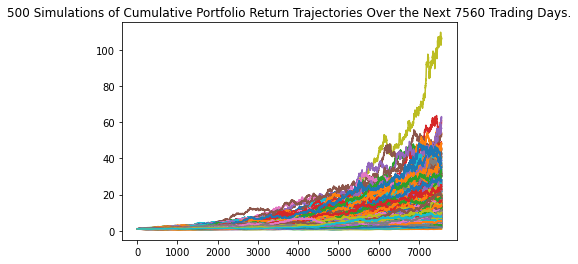

In [32]:

"""This visual function creates a 30 year overlay charts of the probably returns"""

thirty_year_simulation.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

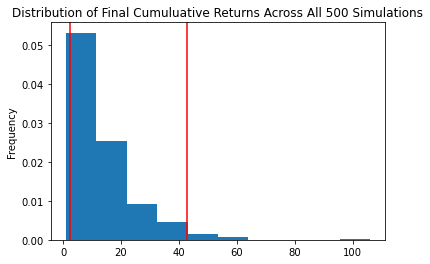

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram

"""This funcition creates a probability distribution of the 30 year returns using the Monte Carlo simulation"""

thirty_year_simulation.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results

"""Here we calculate the summary of the 30 year probabilty including the 95% probability calculations on the high and low side"""

# Save the results as a variable
thirty_year_simulation_results = thirty_year_simulation.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
thirty_year_simulation_results 

count           500.000000
mean             13.714230
std              11.390940
min               0.890523
25%               6.118709
50%              10.209767
75%              17.212013
max             106.089915
95% CI Lower      2.374343
95% CI Upper     42.819389
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio

"""Printing the current total portfolio value to use in later calculations"""

print(total_portfolio)


167357.921


In [36]:

"""Using the upper and lower 95% probability returns, we have created a print statement for the client to view the anyalysis"""

ci_lower_thirty_cumulative_return = thirty_year_simulation_results [8] * total_portfolio
ci_upper_thirty_cumulative_return = thirty_year_simulation_results [9] * total_portfolio


print(f"There is a 95% chance that an initial investment of $120831.043 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")


There is a 95% chance that an initial investment of $120831.043 in the portfolio over the next 30 years will end within in the range of $397365.1734846823 and $7166163.971196353.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:


"""Here we are programming the Monte Carlo simulation to calculate the probable returns 
for a 10 year window using 3 years of historical data
"""

ten_year_simulation = MCSimulation(
    portfolio_data=df_portfolio_three_yrs,
    weights=[0.20, 0.80],
    num_simulation=500,
    num_trading_days=252 * 10,
)

ten_year_simulation.portfolio_data.head()


AGG                                         \
                             open    high       low     close     volume   
time                                                                       
2017-08-07 00:00:00-04:00  109.69  109.72  109.6066  109.6850  1425317.0   
2017-08-08 00:00:00-04:00  109.67  109.69  109.5000  109.5810  1998999.0   
2017-08-09 00:00:00-04:00  109.87  109.87  109.6600  109.6700  2069028.0   
2017-08-10 00:00:00-04:00  109.70  109.85  109.6700  109.8053  1691677.0   
2017-08-11 00:00:00-04:00  109.75  109.94  109.6800  109.8850  1613467.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-08-07 00:00:00-04:00          NaN  247.49  247.87  247.37  247.850   
2017-08-08 00:00:00-04:00    -0.000948  247.51  248.91  246.83  247.291   
2017-08-09 00:00:00-04:00     0.000812  246.47  247.31  246.06  247.230   
2017-08-10 00:00:00-04:00     0.001234  246.28  246.44  243.70  243.790   
2017-08-11 00:00:00-04:00     0.000726  244.02  244.80  243.75  244.110   

                                                  
                             volume daily_return  
time                                              
2017-08-07 00:00:00-04:00  20901988          NaN  
2017-08-08 00:00:00-04:00  44619069    -0.002255  
2017-08-09 00:00:00-04:00  48543032    -0.000247  
2017-08-10 00:00:00-04:00  87857827    -0.013914  
2017-08-11 00:00:00-04:00  56404847     0.001313

In [38]:

"""This function runs the 10 year Monte Carlo simulation"""

ten_year_simulation.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017770,0.982822,1.000952,1.028963,0.976383,1.011347,1.011081,0.993671,1.002088,1.038162,...,0.997256,1.000468,0.994647,1.006385,0.996388,1.014251,0.990196,0.999526,1.002643,0.988018
2,1.012276,0.970664,0.989405,1.036467,0.979846,1.007585,1.017799,1.001040,1.033208,1.035034,...,0.993981,1.006412,0.977392,1.005374,0.987310,1.012000,0.980210,1.008674,1.000444,0.983063
3,1.002389,0.962872,0.994402,1.031169,0.975577,1.002802,1.008540,0.998663,1.032679,1.028135,...,0.993041,1.008960,0.980806,1.018408,0.984903,1.007787,0.973081,1.008743,1.011320,0.976254
4,0.995832,0.935832,1.003395,1.061965,0.966700,1.002868,1.013861,0.989278,1.032765,1.032158,...,0.997944,1.029824,0.984878,1.016717,0.973460,1.011083,0.980562,1.011394,1.032087,0.971387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.266683,1.791950,2.496538,3.703551,5.862307,2.420160,3.172575,1.803316,1.155205,2.831799,...,1.198742,1.674304,3.571246,2.101400,0.732504,7.040154,1.723036,1.362952,1.780140,2.441308
2517,2.276399,1.816842,2.499406,3.666164,5.886053,2.432240,3.172299,1.766627,1.153990,2.800873,...,1.183312,1.682288,3.572967,2.069228,0.733261,7.071026,1.698706,1.374833,1.785023,2.402393
2518,2.308608,1.797349,2.508642,3.718948,5.874926,2.463246,3.225001,1.769288,1.147565,2.789987,...,1.175850,1.680305,3.591822,2.085920,0.734893,7.073302,1.667108,1.399228,1.765496,2.414746
2519,2.275692,1.786941,2.507353,3.710784,5.855577,2.517295,3.238034,1.762232,1.154378,2.754606,...,1.189319,1.708224,3.584927,2.102415,0.746996,6.965732,1.641260,1.399105,1.774458,2.417540


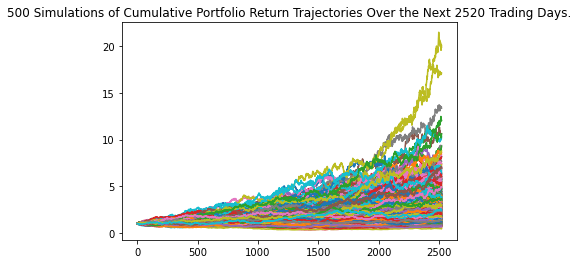

In [39]:


"""Here we have created an overlay chart to visualize the probable returns over 10 years"""

line_plot = ten_year_simulation.plot_simulation()



<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

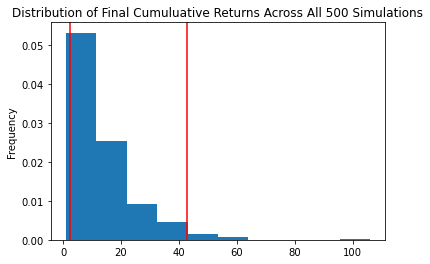

In [40]:


"""Here we have created a distribution chart to better anaylyze the probable returns for 10 years"""

thirty_year_simulation.plot_distribution()


In [41]:


"""Here we have created a function to summarize the data for the 10 year cumulative returns"""

ten_year_summary = ten_year_simulation


ten_year_summary.summarize_cumulative_return()

count           500.000000
mean              2.933940
std               2.079995
min               0.441947
25%               1.675890
50%               2.382003
75%               3.598349
max              19.901593
95% CI Lower      0.805737
95% CI Upper      8.157217
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio

"""Again we have printed the current total portfolio holdings to calculate the probable returns analysis"""

print(total_portfolio)


167357.921


In [43]:
"""Here we have created a statement to summarize the 10 year probable return data"""

ten_year_simulation_results = ten_year_simulation.summarize_cumulative_return()

ten_year_simulation_results



count           500.000000
mean              2.933940
std               2.079995
min               0.441947
25%               1.675890
50%               2.382003
75%               3.598349
max              19.901593
95% CI Lower      0.805737
95% CI Upper      8.157217
Name: 2520, dtype: float64

In [44]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio

"""Here we have created variable and a fucntions to print the calculated 95% probable return data for 10 years
using the Monte Carlo simulation.  We have included a print statement for the client
"""

ci_lower_ten_cumulative_return = ten_year_simulation_results [8] * total_portfolio
ci_upper_ten_cumulative_return = ten_year_simulation_results [9] * total_portfolio

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of $120831.043 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")


There is a 95% chance that an initial investment of $120831.043 in the portfolio over the next 10 years will end within in the range of $134846.47188093181 and $1365174.9565361699.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?